In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'skimage'

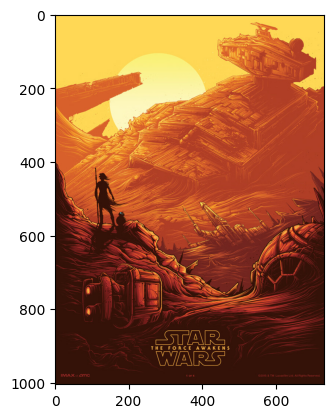

In [18]:
img = Image.open('data/starwars.jpg')
plt.imshow(img)
imgData = np.array(img)


In [33]:
imgData.shape

(1005, 732, 3)

### Test what is the fft of image
All 3 channels seperately

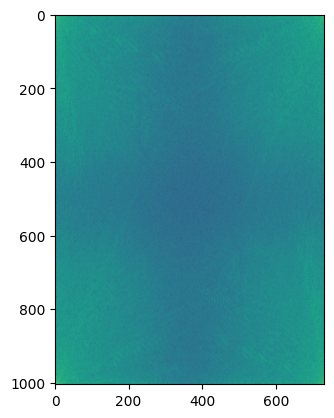

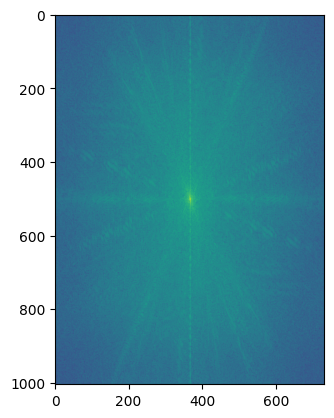

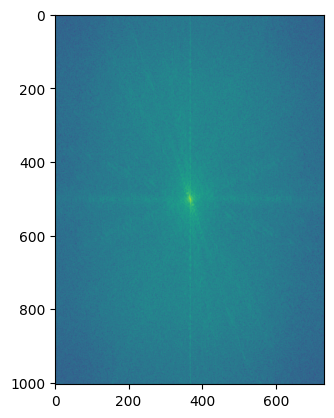

In [44]:
imgfft1 = np.fft.fft2(imgData[:,:,0]) # red
imgfft2 = np.fft.fftshift(np.fft.fft2(imgData[:,:,1])) # green
imgfft3 = np.fft.fftshift(np.fft.fft2(imgData[:,:,2])) # blue

plt.imshow(np.log(abs(imgfft1)));
plt.show()

plt.imshow(np.log(abs(imgfft2)));
plt.show()

plt.imshow(np.log(abs(imgfft3)));
plt.show()

### Image to grayscale 
fft of greyscaled image

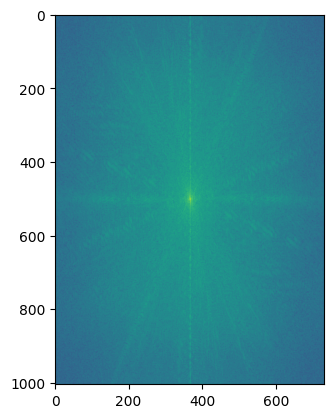

In [43]:
imgGray = img.convert('L')
imgGrayData = np.array(imgGray)

imgGrayFft = np.fft.fftshift(np.fft.fft2(imgGrayData)) # red
plt.imshow(np.log(abs(imgGrayFft)));
plt.show()


In [45]:
imgfft2.shape

(1005, 732)

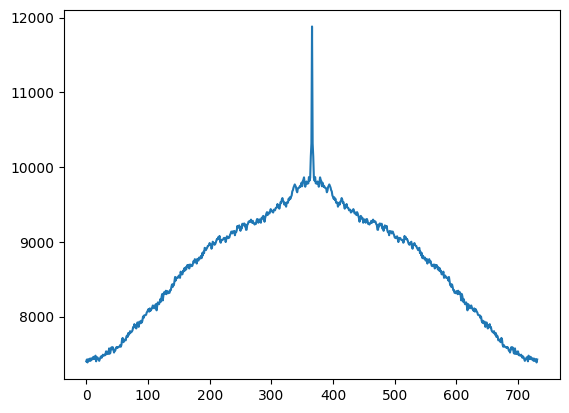

In [51]:
test = np.zeros(imgfft2.shape[1])

funnyTest = np.log(abs(imgGrayFft))

# reduce dimensions of imgfft2 bc why not
for i in range(imgfft2.shape[1]):
    for j in range(imgfft2.shape[0]):
        test[i] += funnyTest[j][i]

plt.plot(test)
    


c:\users\bloqd\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


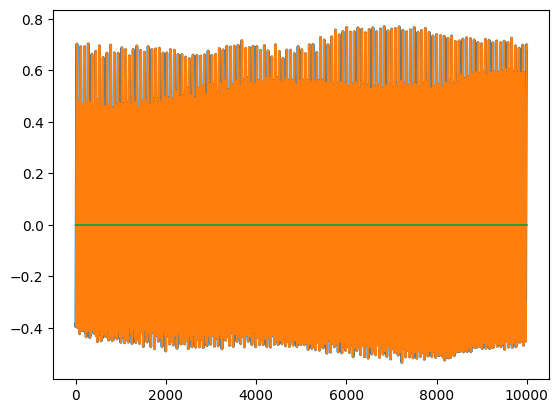

In [83]:
import librosa
import scipy.io.wavfile as wave
from IPython.display import Audio

fs, trumpet = wave.read('data/trumpet.wav')
trumpet = trumpet / np.max(np.abs(trumpet))
trumpet = trumpet[:10000]

trumpFreqDom = np.fft.fft(trumpet) # go into freq domain
doesthiswork = np.fft.ifft(trumpFreqDom)

plt.plot(trumpet, linewidth=2)
plt.plot(doesthiswork)
plt.plot(doesthiswork-trumpet)
plt.show()

Audio(data=trumpet, rate=fs)


C:\Users\bloqd\AppData\Local\Temp\ipykernel_6224\439159576.py:7: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  x_int = interpolation.zoom(x,z)


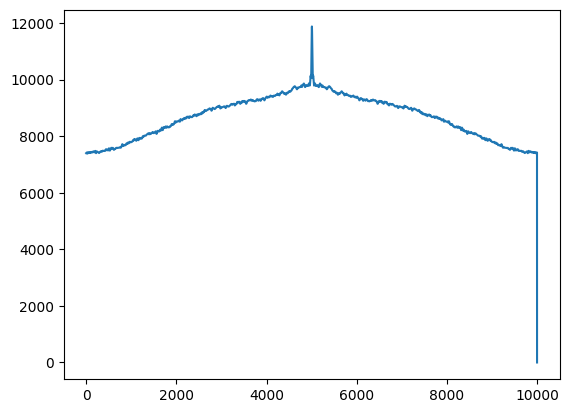

In [84]:
from scipy.ndimage import interpolation

x = test
i = len(trumpet)
z = i / len(x)

x_int = interpolation.zoom(x,z)
plt.plot(x_int)

In [85]:
def test_convo(audio, fft):
    audioFreqDom = np.fft.fft(audio)
    return np.fft.ifft(audioFreqDom * fft)

In [86]:
t1 = test_convo(trumpet, x_int)

In [91]:
Audio(data=trumpet, rate=fs)

In [92]:
Audio(data=t1, rate=fs)


### Second take

In [28]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.io import wavfile
from PIL import Image
from IPython.display import Audio


Read Audio and Image Data

In [4]:

# Load audio file
sample_rate, audio_data_clean = wavfile.read("data/trumpet.wav")

# Load image file
image = Image.open("data/starwars.jpg")
image_data = np.array(image.convert('L'))  # Convert to grayscale

# Normalize audio data
audio_data = audio_data_clean / np.max(np.abs(audio_data_clean))

In [97]:
# Ensure dimensions match
if len(audio_data) > image_data.shape[0]:
    audio_data = audio_data[:image_data.shape[0]]
elif len(audio_data) < image_data.shape[0]:
    image_data = image_data[:len(audio_data)]

# Perform convolution
convolved_result = convolve2d(image_data, np.expand_dims(audio_data, axis=1), mode='same')

# Normalize result
convolved_result /= np.max(np.abs(convolved_result))

In [107]:
flattened = convolved_result.flatten()

sumed_axis_0 = np.sum(convolved_result, axis=0)
sumed_axis_0 = sumed_axis_0 / np.max(np.abs(sumed_axis_0))

sumed_axis_1 = np.sum(convolved_result, axis=1)
sumed_axis_1 = sumed_axis_1 / np.max(np.abs(sumed_axis_1))

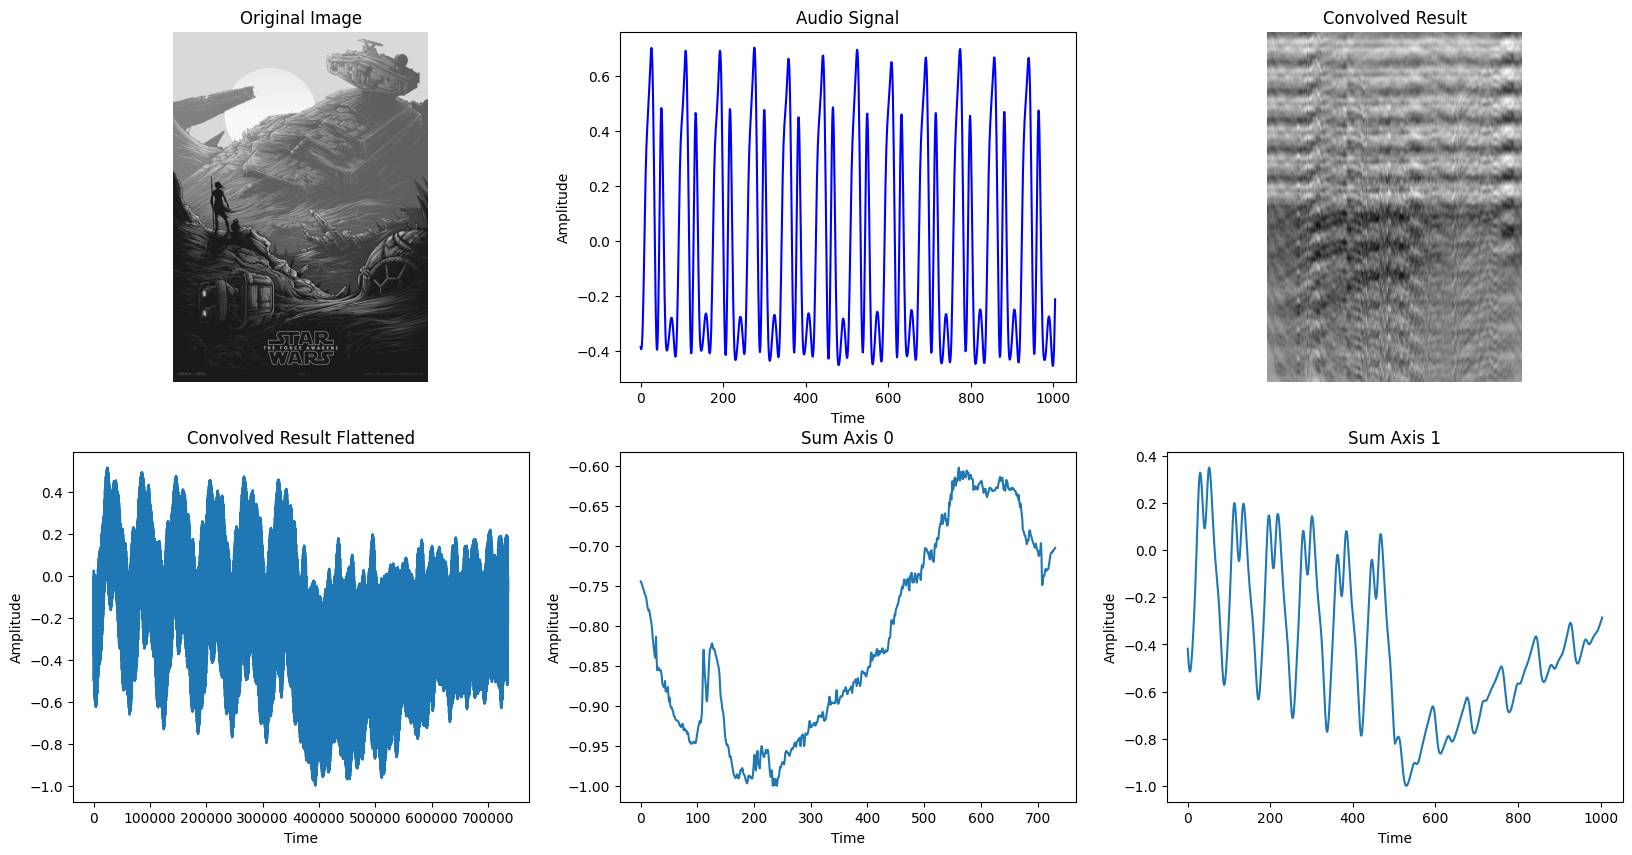

In [108]:

# Visualize result
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.plot(audio_data, color='b')
plt.title('Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 3)
plt.imshow(convolved_result, cmap='gray')
plt.title('Convolved Result')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(flattened)
plt.title('Convolved Result Flattened')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.subplot(2, 3, 5)
plt.plot(sumed_axis_0)
plt.title('Sum Axis 0')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 6)
plt.plot(sumed_axis_1)
plt.title('Sum Axis 1')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

In [116]:
Audio(data=sumed_axis_1, rate=sample_rate)


In [113]:
# Amplitude modulation
transposed_audio = audio_data * sumed_axis_1

# Normalize transposed audio
transposed_audio /= np.max(np.abs(transposed_audio))

In [115]:
Audio(data=transposed_audio, rate=sample_rate)

In [124]:
# Implement convolution of audio and image as a function, width of the image should be the same as the length of the audio
def image_audio_convolve_window(image, audio):
    # Perform convolution
    convolved_result = convolve2d(image, np.expand_dims(audio, axis=1), mode='same')

    # Normalize result
    convolved_result /= np.max(np.abs(convolved_result))
    
    result = np.sum(convolved_result, axis=1)
    result = result / np.max(np.abs(result))

    return result

# Audio length > Image width
def image_audio_convolve(image, audio):
    # Ensure dimensions match
    if len(audio) < image_data.shape[0]:
        print("Wrogn")
        return
    
    index = 0
    window = image_data.shape[0]
    while index < len(audio):
        audio_slice = audio[index:index+window]
        result = image_audio_convolve_window(image, audio_slice)
        if index == 0:
            convolved_result = result
        else:
            convolved_result = np.concatenate((convolved_result, result))
        index += window
   
    return convolved_result

In [129]:
audio_convolved = image_audio_convolve(image_data, audio_data)
audio_convolved.shape

(80400,)

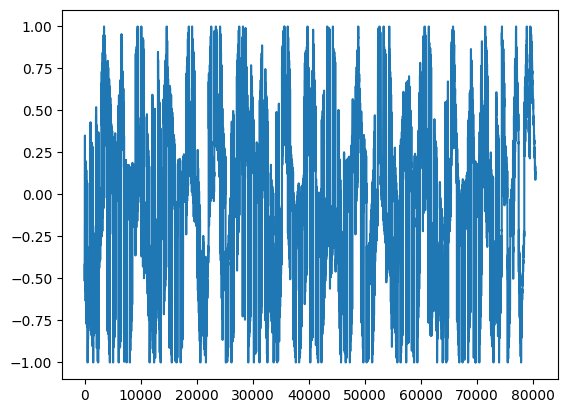

In [130]:
plt.plot(audio_convolved)
plt.show()
Audio(data=audio_convolved, rate=sample_rate)

In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.io import wavfile
from PIL import Image

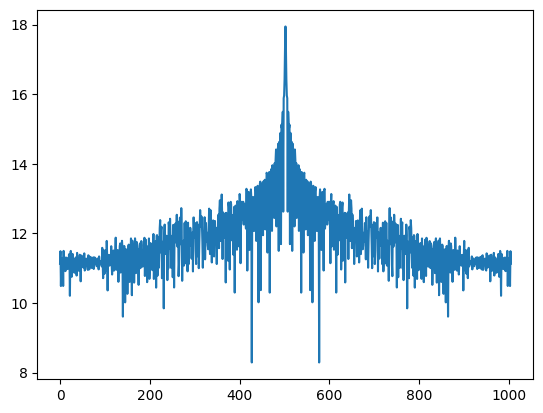

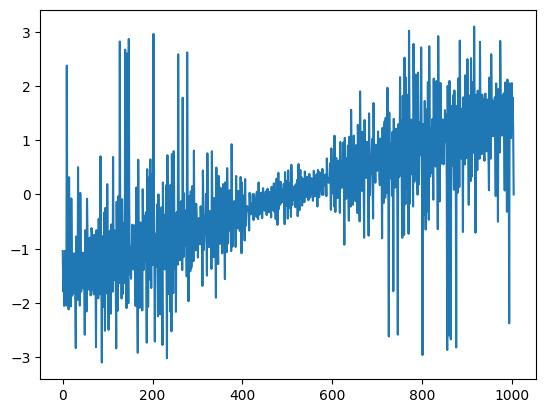

In [52]:
def get_1d_image_fft(image):
    imageFft = np.fft.fftshift(np.fft.fft2(image))
    imageFft1d = np.sum(imageFft, axis=1)

    return imageFft1d


image_fft = get_1d_image_fft(image_data)
plt.plot(np.log(abs(image_fft)))
plt.show()

plt.plot(np.angle(np.fft.fftshift(image_fft)))
plt.show()

In [33]:
# Implement convolution of audio and image as a function, width of the image should be the same as the length of the audio
def image_audio_convolve_window_1d(image, audio):
    if(image.shape[0] != audio.shape[0]):
        print("Wrong")
        return np.zeros(audio.shape[0])
    
    audioFff = np.fft.fft(audio)
    imageFft = get_1d_image_fft(image)
    combined = imageFft * audioFff
    return np.fft.ifft(combined)

# Audio length > Image width
def image_audio_convolve_1d(image, audio):
    # Ensure dimensions match
    if len(audio) < image_data.shape[0]:
        print("Wrogn")
        return
    
    index = 0
    window = image_data.shape[0]
    while index < len(audio):
        print(index/len(audio) * 100, "%")

        audio_slice = audio[index:index+window]
        result = image_audio_convolve_window_1d(image, audio_slice)

        if index == 0:
            convolved_result = result
        else:
            convolved_result = np.concatenate((convolved_result, result))
        index += window
   
    return convolved_result

In [39]:
audio_convolved = image_audio_convolve_1d(image_data, audio_data)

audio_convolved = audio_convolved / np.max(np.abs(audio_convolved))

audio_convolved.shape

0.0 %
1.25625 %
2.5125 %
3.76875 %
5.025 %
6.281249999999999 %
7.5375 %
8.79375 %
10.05 %
11.30625 %
12.562499999999998 %
13.81875 %
15.075 %
16.33125 %
17.5875 %
18.84375 %
20.1 %
21.35625 %
22.6125 %
23.86875 %
25.124999999999996 %
26.38125 %
27.6375 %
28.89375 %
30.15 %
31.406250000000004 %
32.6625 %
33.918749999999996 %
35.175 %
36.43125 %
37.6875 %
38.94375 %
40.2 %
41.45625 %
42.7125 %
43.96875 %
45.225 %
46.48125 %
47.7375 %
48.993750000000006 %
50.24999999999999 %
51.506249999999994 %
52.7625 %
54.018750000000004 %
55.275 %
56.53125 %
57.7875 %
59.043749999999996 %
60.3 %
61.55625 %
62.81250000000001 %
64.06875 %
65.325 %
66.58125 %
67.83749999999999 %
69.09375 %
70.35 %
71.60625 %
72.8625 %
74.11875 %
75.375 %
76.63125 %
77.8875 %
79.14375 %
80.4 %
81.65625 %
82.9125 %
84.16875 %
85.425 %
86.68125 %
87.9375 %
89.19375000000001 %
90.45 %
91.70625 %
92.9625 %
94.21875 %
95.475 %
96.73125 %
97.98750000000001 %
99.24374999999999 %
Wrong


(80000,)

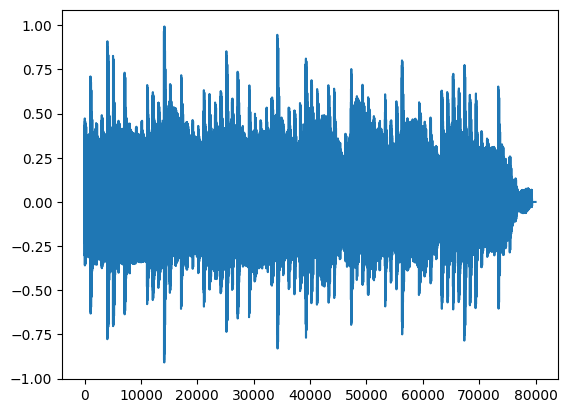

In [40]:
plt.plot(audio_convolved)
plt.show()
Audio(data=audio_convolved, rate=sample_rate)

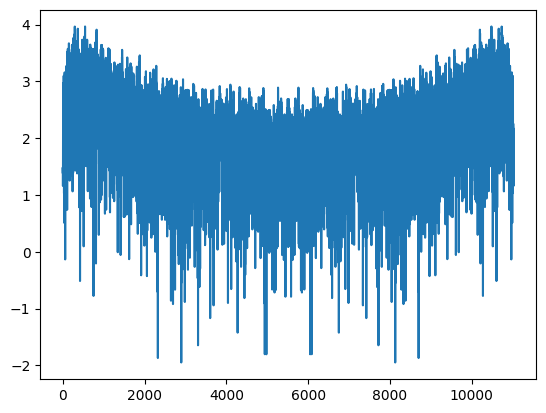

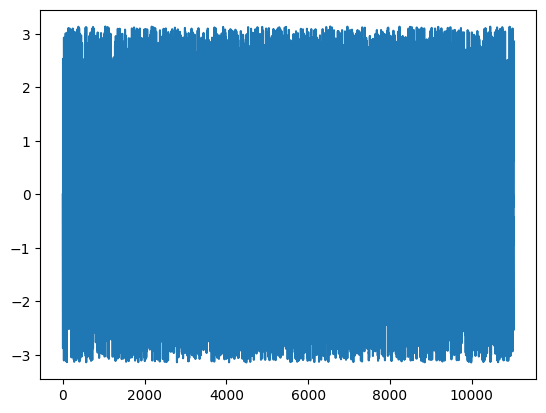

In [50]:
# read mono chopper audio file
fs, chopper = wavfile.read('data/chopper.wav')

# normalize chopper audio
chopper = chopper[:,0] / np.max(np.abs(chopper[:,0]))

# calculate fft
chopper_fft = np.fft.fft(chopper)

# plot magnitude response
plt.plot(np.log(np.abs(chopper_fft)))
plt.show()

# plot phase response in radians
plt.plot(np.angle(chopper_fft))
plt.show()

In [31]:
Audio(data=audio_data, rate=sample_rate)
